<a href="https://colab.research.google.com/github/chaithanya21/Tensorflow-In-Practice/blob/master/Image_Classification_on_the_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
!pip install tensorflow==2.0.0.rc1

     |████████████████████████████████| 86.3MB 351kB/s 
     |████████████████████████████████| 4.3MB 33.5MB/s 
     |████████████████████████████████| 501kB 45.4MB/s 
  Found existing installation: tensorflow 1.14.0
    Uninstalling tensorflow-1.14.0:
      Successfully uninstalled tensorflow-1.14.0


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.0.0-rc1


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pathlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
from tensorflow import  keras

In [0]:
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
tf.random.set_seed(100)

In [0]:
MNIST=keras.datasets.mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)=MNIST.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 1.1270 - accuracy: 0.7224 - val_loss: 0.6315 - val_accuracy: 0.8558
Epoch 2/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.5520 - accuracy: 0.8656 - val_loss: 0.4585 - val_accuracy: 0.8871
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4420 - accuracy: 0.8865 - val_loss: 0.3917 - val_accuracy: 0.9004
Epoch 4/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3916 - accuracy: 0.8963 - val_loss: 0.3567 - val_accuracy: 0.9067
Epoch 5/10
60000/60000 [==============================] - 1s 13us/sample - loss: 0.3617 - accuracy: 0.9028 - val_loss: 0.3362 - val_accuracy: 0.9095
Epoch 6/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.3418 - accuracy: 0.9073 - val_loss: 0.3208 - val_accuracy: 0.9117
Epoch 7/10
60000/60000 [==============================] 

In [0]:
# summarize history for accuracy
def plot_acc(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
# summarize history for loss
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

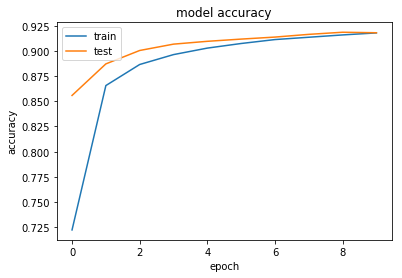

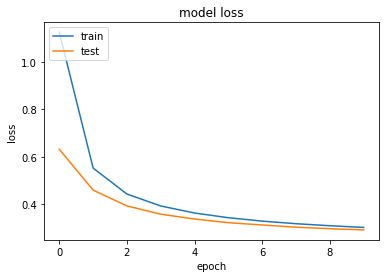

In [0]:
plot_acc(history)
plot_loss(history)

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300,activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, batch_size=512, validation_data = (test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.4703 - accuracy: 0.8746 - val_loss: 0.2386 - val_accuracy: 0.9316
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2016 - accuracy: 0.9430 - val_loss: 0.1653 - val_accuracy: 0.9528
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1490 - accuracy: 0.9583 - val_loss: 0.1383 - val_accuracy: 0.9605
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1164 - accuracy: 0.9674 - val_loss: 0.1115 - val_accuracy: 0.9681
Epoch 5/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0952 - accuracy: 0.9733 - val_loss: 0.1025 - val_accuracy: 0.9699
Epoch 6/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0790 - accuracy: 0.9780 - val_loss: 0.0901 - val_accuracy: 0.9728
Epoch 7/10
60000/60000 [==============================] 